In [1]:
%matplotlib inline


# Station Plot

Make a station plot, complete with sky cover and weather symbols.

Notebook adapted from: https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html


In [41]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd

from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

## The setup

First read in the data. We use the metar reader because it simplifies a lot of tasks,
like dealing with separating text and assembling a pandas dataframe
https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.html

We are building an archive of these files (goes back to mid-May 2021), which I'll point you to if you want to access different dates/times. (Or there are other sources for older files with surface data.)



In [49]:
## define the time we're plotting
datetime = pd.Timestamp(2021, 12, 11, 3)  ## year, month, day, hour, (minute, second)

In [50]:
#data = metar.parse_metar_file('metar_20211211_0300.txt')
data = metar.parse_metar_file("metar_"+datetime.strftime("%Y%m%d_%H%M")+".txt")

# Drop rows with missing winds
data = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

Now we have the METAR data in a much nicer format (a pandas dataframe):

In [54]:
data

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,visibility,current_wx1,current_wx2,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KC62,KC62,41.470000,-85.27,306.0,2022-01-11 02:55:00,160.0,11.0,4023.360,-RA,NaN,...,10.0,10.0,29.63,61,0,0,AO2 T01010101,1004.13,-3.762222e+00,10.336619
KFDW,KFDW,34.320000,-81.12,176.0,2022-01-11 02:55:00,130.0,4.0,402.336,FG,NaN,...,10.0,10.0,30.11,45,0,0,AO1,1020.30,-3.064178e+00,2.571150
KBRY,KBRY,37.816667,-85.50,204.0,2022-01-11 02:55:00,180.0,10.0,16093.440,NaN,NaN,...,17.0,16.0,29.73,0,0,0,AO1,1006.81,-1.224647e-15,10.000000
KW63,KW63,36.600000,-78.57,128.0,2022-01-11 02:55:00,0.0,0.0,16093.440,NaN,NaN,...,12.0,9.0,30.09,0,0,0,AO1,1019.42,-0.000000e+00,-0.000000
KLBE,KLBE,40.270000,-79.40,361.0,2022-01-11 02:50:00,0.0,0.0,16093.440,NaN,NaN,...,13.0,8.0,29.91,0,0,0,,1013.28,-0.000000e+00,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HKEL,HKEL,0.400000,35.22,2133.0,2022-01-11 03:00:00,130.0,11.0,9999.000,NaN,NaN,...,11.0,9.0,30.18,0,0,0,,1019.91,-8.426489e+00,7.070664
HKJK,HKJK,-1.320000,36.92,1624.0,2022-01-11 03:00:00,40.0,7.0,9999.000,NaN,NaN,...,16.0,15.0,30.15,0,0,0,NOSIG,1017.19,-4.499513e+00,-5.362311
HRYR,HRYR,-1.970000,30.12,1497.0,2022-01-11 03:00:00,160.0,3.0,8000.000,NaN,NaN,...,17.0,17.0,30.03,0,0,0,,1013.04,-1.026060e+00,2.819078


This sample data has *way* too many stations to plot all of them. The number
of stations plotted will be reduced using `reduce_point_density`.



In [51]:
# Set up the map projection
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a 150km radius
point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values,
                                   data['latitude'].values)
data = data[reduce_point_density(point_locs, 200000.)]

## The payoff



/Users/rschumac/opt/miniforge3/envs/ats641_2022/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/rschumac/opt/miniforge3/envs/ats641_2022/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/rschumac/opt/miniforge3/envs/ats641_2022/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

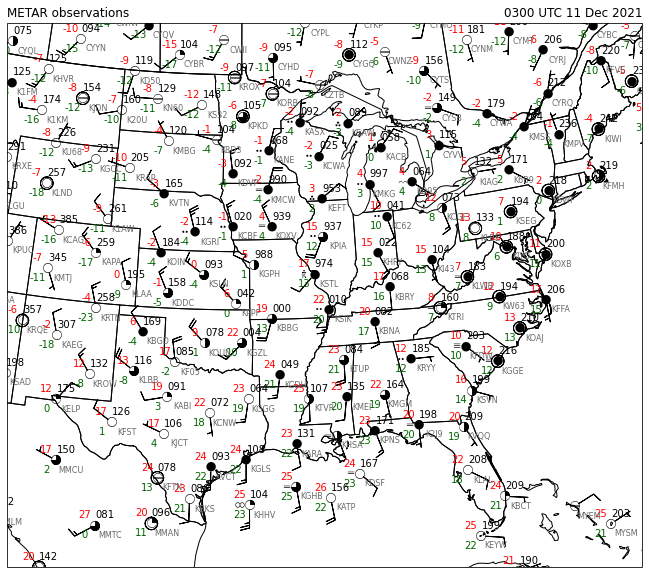

In [52]:
# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 255

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(20, 10))
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set plot bounds
#ax.set_extent((-118, -73, 23, 50))
ax.set_extent((-108,-73, 23, 50))

#
# Here's the actual station plot
#

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=10)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values,
                     length=6)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((1.5, -1), data['station_id'].values, fontsize=8, color='dimgray')

plt.title('METAR observations', loc='left')
plt.title(datetime.strftime("%H%M UTC %d %b %Y"), loc='right')

plt.show()

In [53]:
fig.savefig("sfc_test.png", bbox_inches='tight', facecolor='white', transparent=False)